<a href="https://colab.research.google.com/github/YeshwanthSadum/Machine-Learning/blob/main/ICU_Dataset_Iterative_Imputer%2C_MD%2C_Cat2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/ICU.csv')

In [ ]:
data.shape

(7886, 117)

In [ ]:
data.describe()

,recordid,Length_of_stay,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
count,7886.000000,7886.000000,7886.000000,7886.000000,7878.000000,4139.00000,7231.000000,7886.000000,7886.000000,7886.000000,...,5510.000000,383.000000,1802.000000,7812.000000,5339.000000,6001.000000,4979.000000,4979.00000,4979.000000,4979.000000
mean,142672.923028,13.795714,0.142277,64.489095,0.563087,173.61484,81.418544,0.146335,0.209105,0.282272,...,122.890744,7.057180,0.957580,12.294480,84.837348,7.399758,292.355493,1901.55473,0.620607,12.171320
std,5861.405124,12.685183,0.349357,17.307736,0.496036,182.02021,23.336896,0.353464,0.406695,0.450134,...,23.944656,10.314027,2.374446,7.110933,24.281131,0.059678,496.175508,876.42615,0.485285,5.800744
min,132539.000000,1.000000,0.000000,15.000000,0.000000,121.90000,35.000000,0.000000,0.000000,0.000000,...,3.000000,0.300000,0.010000,1.000000,35.000000,7.030000,0.000000,0.00000,0.000000,1.000000
25%,137588.250000,6.000000,0.000000,53.000000,0.000000,162.60000,66.000000,0.000000,0.000000,0.000000,...,106.000000,0.700000,0.040000,8.400000,68.500000,7.370000,53.000000,1143.00000,0.000000,7.000000
50%,142681.500000,10.000000,0.000000,67.000000,1.000000,170.20000,78.200000,0.000000,0.000000,0.000000,...,121.000000,1.900000,0.130000,11.200000,81.700000,7.410000,121.000000,2307.00000,1.000000,13.000000
75%,147765.500000,17.000000,0.000000,78.000000,1.000000,177.80000,92.000000,0.000000,0.000000,1.000000,...,138.000000,9.350000,0.670000,14.700000,97.200000,7.440000,248.500000,2660.50000,1.000000,16.000000
max,152864.000000,171.000000,1.000000,90.000000,1.000000,11220.00000,295.000000,1.000000,1.000000,1.000000,...,260.000000,49.600000,24.040000,263.100000,295.000000,7.660000,2872.000000,2880.00000,1.000000,44.000000


We drop columns where more than 50% data is missing

In [ ]:
data1 = data.isna().sum()
data1 = pd.DataFrame(data1)
data1['percent'] = (data1/len(data))*100
col_to_drop = np.array(data1[data1['percent']>=50].index)
col_to_drop

array(['RespRate_first', 'SaO2_first', 'RespRate_last', 'SaO2_last',
       'RespRate_lowest', 'SaO2_lowest', 'RespRate_highest',
       'SaO2_highest', 'RespRate_median', 'SaO2_median', 'ALP_first',
       'ALT_first', 'AST_first', 'Albumin_first', 'Bilirubin_first',
       'Cholesterol_first', 'TroponinI_first', 'TroponinT_first',
       'ALP_last', 'ALT_last', 'AST_last', 'Albumin_last',
       'Bilirubin_last', 'Cholesterol_last', 'TroponinI_last',
       'TroponinT_last'], dtype=object)

In [ ]:
data = data.drop(col_to_drop, axis = 1)

In [ ]:
data.head()

,recordid,Length_of_stay,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,...,PaO2_last,Platelets_last,SysABP_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,132539,5,0,54,0.0,NaN,NaN,0,0,1,...,NaN,185.0,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,8,0,76,1.0,175.3,76.0,0,1,0,...,140.0,135.0,103.0,13.3,81.6,7.37,71.0,360.0,0.0,5.0
2,132541,19,0,44,0.0,NaN,56.7,0,0,0,...,173.0,113.0,126.0,6.2,56.7,7.47,617.0,2160.0,1.0,14.0
3,132543,9,0,68,1.0,180.3,84.6,0,0,0,...,NaN,284.0,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN
4,132545,4,0,88,0.0,NaN,NaN,0,0,0,...,NaN,97.0,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# we drop record id 
data = data.drop('recordid', axis = 1)

In [ ]:
data.shape

(7886, 90)

In [ ]:
#data = data.drop('In-hospital_death', axis = 1)
data = data.drop('Length_of_stay', axis = 1)

In [ ]:
# X = data.drop('Length_of_stay', axis=1)
# y = data['Length_of_stay']

X = data.drop('In-hospital_death', axis=1)
y = data['In-hospital_death']

#Under Sampling

In [ ]:
pip install imblearn

In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', np.mean(y))
print('Resample dataset shape', np.mean(y_rus))


original dataset shape: 0.1422774537154451
Resample dataset shape 0.5


In [ ]:
print(x_rus.shape)
print(X.shape)

(2244, 88)
(7886, 88)


#Test_train_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [ ]:
categ_col = [col for col in X_train.columns if(data[col].nunique()<=15)]
categ_col

['Gender',
 'CCU',
 'CSRU',
 'SICU',
 'GCS_first',
 'GCS_last',
 'GCS_lowest',
 'GCS_highest',
 'MechVentLast8Hour']

In [ ]:
num_columns = X_train.drop(categ_col, axis = 1).columns
num_columns

Index(['Age', 'Height', 'Weight', 'DiasABP_first', 'Glucose_first', 'HR_first',
       'MAP_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first',
       'Temp_first', 'DiasABP_last', 'Glucose_last', 'HR_last', 'MAP_last',
       'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Temp_last',
       'DiasABP_lowest', 'Glucose_lowest', 'HR_lowest', 'MAP_lowest',
       'NIDiasABP_lowest', 'NIMAP_lowest', 'NISysABP_lowest', 'Temp_lowest',
       'DiasABP_highest', 'Glucose_highest', 'HR_highest', 'MAP_highest',
       'NIDiasABP_highest', 'NIMAP_highest', 'NISysABP_highest',
       'Temp_highest', 'DiasABP_median', 'GCS_median', 'Glucose_median',
       'HR_median', 'MAP_median', 'NIDiasABP_median', 'NIMAP_median',
       'NISysABP_median', 'Temp_median', 'BUN_first', 'Creatinine_first',
       'FiO2_first', 'HCO3_first', 'HCT_first', 'K_first', 'Lactate_first',
       'Mg_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first',
       'SysABP_first', 'WBC_first', 'Weight_f

#Iterative Imputation

In [ ]:
# def to_int(x):
#     try:
#       return int(x)
#     except:
#       return np.nan

# for col in categ_col:

#   data[col] =data[col].apply(to_int)

In [ ]:
# data['Gender'].apply(to_int).unique()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
X_train[X_train.columns]  = imp.transform(X_train)
X_test[X_test.columns] = imp.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
for col in categ_col:
  X_train[col] = X_train[col].round(0).astype('int64')
  X_test[col] = X_test[col].round(0).astype('int64')

In [ ]:
X_train.Gender.unique()

array([0, 1])

#Outlier detection Using Mahalanobis distance

In [ ]:
num_columns

Index(['Age', 'Height', 'Weight', 'DiasABP_first', 'Glucose_first', 'HR_first',
       'MAP_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first',
       'Temp_first', 'DiasABP_last', 'Glucose_last', 'HR_last', 'MAP_last',
       'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Temp_last',
       'DiasABP_lowest', 'Glucose_lowest', 'HR_lowest', 'MAP_lowest',
       'NIDiasABP_lowest', 'NIMAP_lowest', 'NISysABP_lowest', 'Temp_lowest',
       'DiasABP_highest', 'Glucose_highest', 'HR_highest', 'MAP_highest',
       'NIDiasABP_highest', 'NIMAP_highest', 'NISysABP_highest',
       'Temp_highest', 'DiasABP_median', 'GCS_median', 'Glucose_median',
       'HR_median', 'MAP_median', 'NIDiasABP_median', 'NIMAP_median',
       'NISysABP_median', 'Temp_median', 'BUN_first', 'Creatinine_first',
       'FiO2_first', 'HCO3_first', 'HCT_first', 'K_first', 'Lactate_first',
       'Mg_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first',
       'SysABP_first', 'WBC_first', 'Weight_f

In [ ]:
num_columns = np.delete(num_columns,0)

In [ ]:
num_columns

Index(['Height', 'Weight', 'DiasABP_first', 'Glucose_first', 'HR_first',
       'MAP_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first',
       'Temp_first', 'DiasABP_last', 'Glucose_last', 'HR_last', 'MAP_last',
       'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Temp_last',
       'DiasABP_lowest', 'Glucose_lowest', 'HR_lowest', 'MAP_lowest',
       'NIDiasABP_lowest', 'NIMAP_lowest', 'NISysABP_lowest', 'Temp_lowest',
       'DiasABP_highest', 'Glucose_highest', 'HR_highest', 'MAP_highest',
       'NIDiasABP_highest', 'NIMAP_highest', 'NISysABP_highest',
       'Temp_highest', 'DiasABP_median', 'GCS_median', 'Glucose_median',
       'HR_median', 'MAP_median', 'NIDiasABP_median', 'NIMAP_median',
       'NISysABP_median', 'Temp_median', 'BUN_first', 'Creatinine_first',
       'FiO2_first', 'HCO3_first', 'HCT_first', 'K_first', 'Lactate_first',
       'Mg_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first',
       'SysABP_first', 'WBC_first', 'Weight_first', 

In [ ]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [ ]:
X_train['mahalanobis'] = mahalanobis(x=X_train[num_columns], data=X_train[num_columns])
X_train

,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,...,Platelets_last,SysABP_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum,mahalanobis
746,77.0,0,154.220961,72.90262,0,0,0,59.296016,11,153.0,...,144.0,115.672413,75.3,80.297495,7.270000,571.661825,2558.390784,1,15.963425,121.731889
423,45.0,1,167.600000,70.00000,0,0,1,61.090752,6,118.0,...,145.0,122.796900,5.5,72.500000,7.410248,118.000000,2640.000000,1,13.000000,34.477828
1100,54.0,1,177.800000,82.00000,0,1,0,43.000000,3,144.0,...,239.0,105.000000,16.5,86.212480,7.300000,139.000000,700.000000,0,7.000000,116.817527
1914,31.0,1,182.900000,94.80000,0,0,0,44.000000,3,30.0,...,13.0,132.000000,12.0,94.800000,7.390000,203.000000,2670.000000,1,27.000000,105.550606
869,43.0,1,173.455189,70.00000,0,0,1,80.000000,3,209.0,...,191.0,110.000000,10.3,76.432715,7.370000,264.000000,2595.000000,1,18.000000,45.004071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,87.0,1,172.495946,65.50000,0,0,0,65.000000,14,155.0,...,64.0,98.000000,7.3,56.000000,7.420000,1464.000000,1205.000000,1,6.000000,83.330401
1095,58.0,1,162.600000,63.40000,1,0,0,67.000000,15,122.0,...,211.0,132.000000,10.4,67.500000,7.440000,1524.000000,195.000000,0,2.000000,46.348661
1130,61.0,0,170.200000,165.00000,1,0,0,74.000000,14,94.0,...,288.0,101.000000,11.5,161.538014,7.320000,728.267070,1598.818061,1,10.107599,127.835174
1294,72.0,1,171.345652,70.00000,0,0,0,42.000000,15,273.0,...,96.0,99.000000,12.4,70.000000,7.260000,890.617214,1586.276440,1,11.000043,76.908032


In [ ]:
from scipy.special import chdtri
chdtri(len(num_columns),1-0.99)

109.95806909135288

In [ ]:
X_train[X_train['mahalanobis']>=111]

,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,...,Platelets_last,SysABP_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum,mahalanobis
746,77.0,0,154.220961,72.90262,0,0,0,59.296016,11,153.0,...,144.0,115.672413,75.3,80.297495,7.270000,571.661825,2558.390784,1,15.963425,121.731889
1100,54.0,1,177.800000,82.00000,0,1,0,43.000000,3,144.0,...,239.0,105.000000,16.5,86.212480,7.300000,139.000000,700.000000,0,7.000000,116.817527
879,83.0,1,162.600000,72.50000,0,0,1,52.000000,15,212.0,...,87.0,156.000000,20.3,82.500000,7.450000,646.000000,2230.000000,1,23.000000,114.873756
178,58.0,0,157.570493,61.60000,0,0,0,62.000000,15,294.0,...,339.0,109.000000,18.6,61.600000,7.350000,547.000000,2128.000000,1,10.000000,112.951319
1941,83.0,0,165.100000,83.00000,0,0,1,85.000000,10,114.0,...,157.0,78.000000,10.8,84.833403,7.440000,136.000000,2700.000000,1,15.000000,310.132934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,30.0,1,177.800000,142.40000,0,0,0,38.000000,12,137.0,...,90.0,86.000000,25.4,142.400000,7.300000,1119.000000,1740.000000,1,11.000000,136.755067
769,81.0,0,167.078836,68.00000,0,0,0,69.000000,7,91.0,...,254.0,105.000000,8.5,73.801348,7.440000,120.000000,2532.000000,1,14.000000,127.207376
2135,46.0,1,175.300000,107.70000,0,1,0,77.000000,3,152.0,...,87.0,24.000000,7.1,107.646054,7.230000,742.000000,1925.000000,1,11.000000,210.992783
1130,61.0,0,170.200000,165.00000,1,0,0,74.000000,14,94.0,...,288.0,101.000000,11.5,161.538014,7.320000,728.267070,1598.818061,1,10.107599,127.835174


In [ ]:
X_train['y'] = y_train
X_train = X_train[X_train['mahalanobis']<111]
y_train = X_train['y']
X_train = X_train.drop('y', axis = 1)

Removing Outliers from test data

In [ ]:
X_test['mahalanobis'] = mahalanobis(x=X_test[num_columns], data=X_test[num_columns])
X_test

,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,...,Platelets_last,SysABP_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum,mahalanobis
1666,87.0,0,172.297509,82.0,0,0,1,93.000000,11,121.000000,...,160.000000,114.000000,13.900000,82.635620,7.41000,55.000000,2100.000000,0,10.000000,78.887696
2239,67.0,1,174.875357,95.0,1,0,0,52.000000,5,174.000000,...,189.000000,102.000000,11.700000,96.580481,7.46000,42.000000,2785.000000,1,16.000000,78.096415
1550,50.0,0,163.858801,44.0,0,0,0,58.000000,5,160.470581,...,184.437884,117.000000,12.123838,44.000000,7.52000,80.000000,2675.000000,1,19.000000,65.027621
240,64.0,1,182.900000,113.0,0,0,0,83.000000,11,66.000000,...,127.000000,144.000000,20.800000,112.000000,7.30000,30.000000,2795.000000,1,20.000000,156.925968
686,43.0,0,172.700000,85.4,0,0,0,58.000000,5,92.000000,...,329.000000,101.000000,9.100000,85.400000,7.45000,15.000000,2640.000000,1,17.000000,74.159595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,75.0,0,157.500000,71.3,0,1,0,62.000000,10,140.000000,...,196.000000,112.000000,11.900000,71.000000,7.42000,19.000000,2710.000000,1,15.000000,96.506897
1541,22.0,0,169.355804,60.0,0,0,1,38.000000,3,163.000000,...,95.000000,128.000000,6.100000,66.207945,7.39000,17.000000,2805.000000,1,19.000000,96.886402
2095,71.0,0,167.600000,63.0,0,0,0,59.000000,10,129.000000,...,204.000000,130.000000,17.000000,63.000000,7.42000,147.000000,2654.000000,1,12.000000,115.835364
621,38.0,1,178.023416,79.0,0,0,1,65.000000,15,121.000000,...,114.000000,127.000000,3.800000,82.453918,7.38777,450.652645,1549.263534,1,10.089307,32.187676


In [ ]:
X_test['y'] = y_test
X_test = X_test[X_test['mahalanobis']<111]
y_test = X_test['y']
X_test = X_test.drop('y', axis = 1)

In [ ]:
X_test[X_test['mahalanobis']>=111]

,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,...,Platelets_last,SysABP_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum,mahalanobis


#Cat2Vec

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras import models
import tensorflow as tf

In [ ]:
def embedding(column_name):
  embedding_size = 3
  model = models.Sequential()
  model.add(Embedding(input_dim = 20, output_dim = embedding_size, input_length = 1, name="embedding"))
  model.add(tf.keras.layers.Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(1))
  model.compile(loss = "BinaryCrossentropy", optimizer = "adam", metrics=["accuracy"])
  model.fit(x = X_train[column_name].to_numpy(), y=y_train.to_numpy() , epochs = 20, batch_size = 64, verbose = 1)
  return model.weights[0].numpy()

In [ ]:
def create_columns_train(weights1,col_name):
  conditions = [(X_train[col_name] == i) for i in X_train[col_name].unique()]
  # conditions = [
  #               (df['bathrooms'] == 2),
  #               (df['bathrooms'] == 1),
  #               (df['bathrooms'] == 3),
  #               (df['bathrooms'] == 4),
  #               (df['bathrooms'] == 6),
  # ]
  # create a list of the values we want to assign for each condition
  # 3 values since embedding size is 3 
  values0 = [weights1[int(i)][0] for i in X_train[col_name].unique()]
  values1 = [weights1[int(i)][1] for i in X_train[col_name].unique()]
  values2 = [weights1[int(i)][2] for i in X_train[col_name].unique()]

  # create a new column and use np.select to assign values to it using our lists as arguments
  X_train['{}_0'.format(col_name)] = np.select(conditions, values0)
  X_train['{}_1'.format(col_name)] = np.select(conditions, values1)
  X_train['{}_2'.format(col_name)] = np.select(conditions, values2)



In [ ]:
def create_columns_test(weights1,col_name):
  conditions = [(X_test[col_name] == i) for i in X_train[col_name].unique()]
  # conditions = [
  #               (df['bathrooms'] == 2),
  #               (df['bathrooms'] == 1),
  #               (df['bathrooms'] == 3),
  #               (df['bathrooms'] == 4),
  #               (df['bathrooms'] == 6),
  # ]
  # create a list of the values we want to assign for each condition
  # 3 values since embedding size is 3 
  values0 = [weights1[int(i)][0] for i in X_train[col_name].unique()]
  values1 = [weights1[int(i)][1] for i in X_train[col_name].unique()]
  values2 = [weights1[int(i)][2] for i in X_train[col_name].unique()]

  # create a new column and use np.select to assign values to it using our lists as arguments
  X_test['{}_0'.format(col_name)] = np.select(conditions, values0)
  X_test['{}_1'.format(col_name)] = np.select(conditions, values1)
  X_test['{}_2'.format(col_name)] = np.select(conditions, values2)



In [ ]:
categ_col

['Gender',
 'CCU',
 'CSRU',
 'SICU',
 'GCS_first',
 'GCS_last',
 'GCS_lowest',
 'GCS_highest',
 'MechVentLast8Hour']

In [ ]:
for col in categ_col:
  weights = embedding(col)
  create_columns_train(weights,col)
  create_columns_test(weights,col)

Epoch 1/20
24/24 [==============================] - 1s 2ms/step - loss: 1.8215 - accuracy: 0.5312
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.9260 - accuracy: 0.5312
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.7571 - accuracy: 0.5312
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.5312
Epoch 5/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5013
Epoch 6/20
24/24 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5113
Epoch 7/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5245
Epoch 8/20
24/24 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5093
Epoch 9/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5265
Epoch 10/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5312
Epoch 11/20
24/24 [

In [ ]:
X_train.head()

,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,...,GCS_last_2,GCS_lowest_0,GCS_lowest_1,GCS_lowest_2,GCS_highest_0,GCS_highest_1,GCS_highest_2,MechVentLast8Hour_0,MechVentLast8Hour_1,MechVentLast8Hour_2
423,45.0,1,167.600000,70.000000,0,0,1,61.090752,6,118.0,...,0.039284,-0.046533,-0.036009,-0.049876,0.004012,-0.028792,0.006936,-0.036923,0.003881,0.017179
1914,31.0,1,182.900000,94.800000,0,0,0,44.000000,3,30.0,...,-0.027696,-0.026130,-0.025984,0.034716,0.094177,-0.076622,0.082333,-0.036923,0.003881,0.017179
869,43.0,1,173.455189,70.000000,0,0,1,80.000000,3,209.0,...,0.032028,-0.026130,-0.025984,0.034716,0.041914,0.006961,0.064930,-0.036923,0.003881,0.017179
1200,70.0,0,162.600000,82.900000,1,0,0,39.000000,8,145.0,...,0.032028,-0.026130,-0.025984,0.034716,-0.047405,-0.001596,0.094072,-0.036923,0.003881,0.017179
695,86.0,0,163.295572,72.644866,0,0,0,63.083372,10,90.0,...,0.002462,0.028378,0.006943,-0.027754,-0.057826,-0.018454,0.028770,-0.036923,0.003881,0.017179


In [ ]:
X_train.drop(categ_col, axis = 1, inplace = True)
X_test.drop(categ_col, axis =1, inplace = True)

In [ ]:
X_train.head()

,Age,Height,Weight,DiasABP_first,Glucose_first,HR_first,MAP_first,NIDiasABP_first,NIMAP_first,NISysABP_first,...,GCS_last_2,GCS_lowest_0,GCS_lowest_1,GCS_lowest_2,GCS_highest_0,GCS_highest_1,GCS_highest_2,MechVentLast8Hour_0,MechVentLast8Hour_1,MechVentLast8Hour_2
423,45.0,167.600000,70.000000,61.090752,118.0,88.000000,84.134610,64.000000,84.000000,125.000000,...,0.039284,-0.046533,-0.036009,-0.049876,0.004012,-0.028792,0.006936,-0.036923,0.003881,0.017179
1914,31.0,182.900000,94.800000,44.000000,30.0,129.000000,60.000000,73.000000,92.670000,132.000000,...,-0.027696,-0.026130,-0.025984,0.034716,0.094177,-0.076622,0.082333,-0.036923,0.003881,0.017179
869,43.0,173.455189,70.000000,80.000000,209.0,88.000000,107.000000,61.673513,77.967627,115.079106,...,0.032028,-0.026130,-0.025984,0.034716,0.041914,0.006961,0.064930,-0.036923,0.003881,0.017179
1200,70.0,162.600000,82.900000,39.000000,145.0,87.000000,49.000000,13.000000,33.670000,75.000000,...,0.032028,-0.026130,-0.025984,0.034716,-0.047405,-0.001596,0.094072,-0.036923,0.003881,0.017179
695,86.0,163.295572,72.644866,63.083372,90.0,84.289561,89.240533,59.076203,79.342286,122.789065,...,0.002462,0.028378,0.006943,-0.027754,-0.057826,-0.018454,0.028770,-0.036923,0.003881,0.017179


#PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train1 = std.transform(X_train)
X_test1 = std.transform(X_test)

In [ ]:
X_train1.shape

(1508, 107)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(50)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

#Prediction

In [ ]:
# from sklearn import linear_model
# reg = linear_model.Lasso(alpha =0.1)
# reg.fit(X_train1,y_train)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score
# pred = reg.predict(X_test1)
# print('Mean Squared Error : {}'.format(mean_squared_error(y_test,pred)))
# print('r2_score : {}'.format(r2_score(y_test,pred)))

In [ ]:
# import matplotlib.pyplot as plt 
# plt.scatter(y_test,pred)
# x = np.arange(min(y_test),max(y_test))
# plt.plot(x,x, color = 'red')

In [ ]:
len(X_train1[0])

50

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = models.Sequential()
#model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
# model.add(Dense(64, activation="relu"))
model.add(Dense(1,  activation="sigmoid"))
model.compile(loss = "BinaryCrossentropy", optimizer = "adam", metrics=["accuracy"])
model.fit(x = X_train1, y=y_train , epochs = 500, batch_size = 64, verbose = 1)


Epoch 1/500
24/24 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.5590
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6102 - accuracy: 0.6718
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5813 - accuracy: 0.6844
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.6950
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7215
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7308
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.7301
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7420
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7473
Epoch 10/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.7626
Epoch 11/

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
model.evaluate(X_test1, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 1.0471 - accuracy: 0.7674


[1.047101378440857, 0.7674418687820435]

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

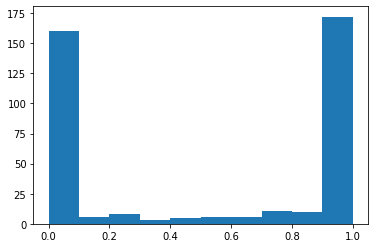

In [ ]:
import matplotlib.pyplot as plt
y_predicted = model.predict(X_test1)
plt.hist(y_predicted)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted>0.5, 1,0)
y_predicted

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[148,  56],
       [ 34, 149]])

In [ ]:
from sklearn import metrics
metrics.f1_score(y_test,y_predicted)

0.768041237113402

Text(33.0, 0.5, 'Truth')

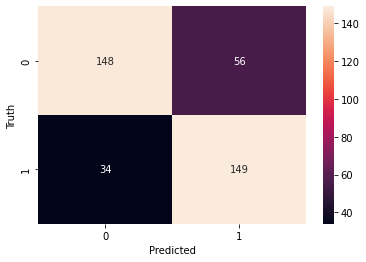

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       204
           1       0.73      0.81      0.77       183

    accuracy                           0.77       387
   macro avg       0.77      0.77      0.77       387
weighted avg       0.77      0.77      0.77       387



In [ ]:
# pred = model.predict(X_test1)
# print('Mean Squared Error : {}'.format(mean_squared_error(y_test,pred)))
# print('r2_score : {}'.format(r2_score(y_test,pred)))

In [ ]:
# plt.scatter(y_test,pred)
# x = np.arange(min(y_test),max(y_test))
# plt.plot(x,x, color = 'red')

In [ ]:
X_train1

array([[ 6.48789018e-01, -1.88206533e+00, -1.63723743e+00, ...,
        -4.32946869e-01,  6.30032269e-01, -9.13930600e-01],
       [-4.06488374e+00, -4.71489437e+00, -4.99740782e+00, ...,
         3.87719377e-01,  1.65301134e+00,  1.10491600e+00],
       [ 2.11510087e+00, -2.86127685e+00, -4.02917440e+00, ...,
        -8.67370242e-02, -5.42143006e-01, -4.35726711e-01],
       ...,
       [ 8.36207888e-01, -5.01233535e-01,  1.46379492e+00, ...,
         8.23220846e-01,  5.79935998e-01,  3.00000056e-01],
       [-6.11115714e-03,  4.79570825e+00,  1.37385608e+00, ...,
         1.26334392e+00, -9.55063098e-02, -1.25533405e+00],
       [-7.10513678e+00, -2.22333353e+00, -1.94546232e+00, ...,
         7.76849249e-01, -8.32397306e-01,  4.30996943e-01]])

In [ ]:
pip install xgboost

In [ ]:
# from xgboost import XGBRegressor
# model = XGBRegressor()
# model.fit(X_train1, y_train)
# pred = model.predict(X_test1)

In [ ]:
# print('Mean Squared Error : {}'.format(mean_squared_error(y_test,pred)))
# print('r2_score : {}'.format(r2_score(y_test,pred)))

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train1, y_train)
pred = model.predict(X_test1)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

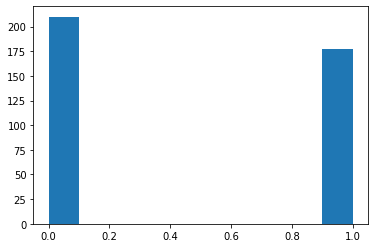

In [ ]:
plt.hist(y_predicted)
y_predicted = pred.flatten()
y_predicted = np.where(y_predicted>0.5, 1,0)
y_predicted

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[162,  42],
       [ 48, 135]])

In [ ]:
from sklearn import metrics
metrics.f1_score(y_test,y_predicted)

0.7500000000000001

Text(33.0, 0.5, 'Truth')

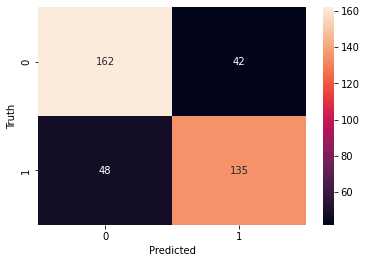

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       204
           1       0.76      0.74      0.75       183

    accuracy                           0.77       387
   macro avg       0.77      0.77      0.77       387
weighted avg       0.77      0.77      0.77       387

